In [39]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

In [48]:
(train_input,train_target),(test_input,test_target) = keras.datasets.imdb.load_data(
    num_words = 500
)

In [49]:
from sklearn.model_selection import train_test_split
train_input,val_input,train_target,val_target = train_test_split(train_input,train_target,test_size=0.2,random_state=42)

In [42]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# train_seq = pad_sequences(train_input,maxlen=100)
# val_seq = pad_sequences(val_input,maxlen=100)

In [50]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input,maxlen=100)
val_seq = pad_sequences(val_input,maxlen=100)
len(train_seq)
len(val_seq)


5000

In [46]:
train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)
# val_oh

MemoryError: Unable to allocate 59.6 GiB for an array with shape (4000000, 2000) and data type float64

In [ ]:
len(val_oh)
len(train_oh)

20000

In [53]:
model = keras.Sequential()
# model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.SimpleRNN(8,input_shape=(100,500)))
model.add(keras.layers.Dense(1,activation='sigmoid'))
rmsprop = keras.optimizers.RMSprop(learning_rate=0.0001)

model.compile(optimizer=rmsprop,loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('simpleRnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

history = model.fit(train_oh,train_target,batch_size=64,epochs=100,validation_data=(val_oh,val_target),callbacks=[checkpoint_cb,early_stopping_cb])


Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node sequential_6_1/embedding_4_1/GatherV2 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Python312\Lib\asyncio\base_events.py", line 641, in run_forever

  File "c:\Python312\Lib\asyncio\base_events.py", line 1987, in _run_once

  File "c:\Python312\Lib\asyncio\events.py", line 88, in _run

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\KOREAVC\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_20032\2179599151.py", line 11, in <module>

  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 314, in fit

  File "c:\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 117, in one_step_on_iterator

  File "c:\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 104, in one_step_on_data

  File "c:\Python312\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 51, in train_step

  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Python312\Lib\site-packages\keras\src\layers\layer.py", line 846, in __call__

  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Python312\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Python312\Lib\site-packages\keras\src\models\sequential.py", line 209, in call

  File "c:\Python312\Lib\site-packages\keras\src\models\functional.py", line 202, in call

  File "c:\Python312\Lib\site-packages\keras\src\ops\function.py", line 155, in _run_through_graph

  File "c:\Python312\Lib\site-packages\keras\src\models\functional.py", line 592, in call

  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Python312\Lib\site-packages\keras\src\layers\layer.py", line 846, in __call__

  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "c:\Python312\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "c:\Python312\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "c:\Python312\Lib\site-packages\keras\src\layers\core\embedding.py", line 146, in call

  File "c:\Python312\Lib\site-packages\keras\src\ops\numpy.py", line 4850, in take

  File "c:\Python312\Lib\site-packages\keras\src\backend\tensorflow\numpy.py", line 1940, in take

indices[56,112] = 1146 is not in [0, 500)
	 [[{{node sequential_6_1/embedding_4_1/GatherV2}}]] [Op:__inference_one_step_on_iterator_49317]

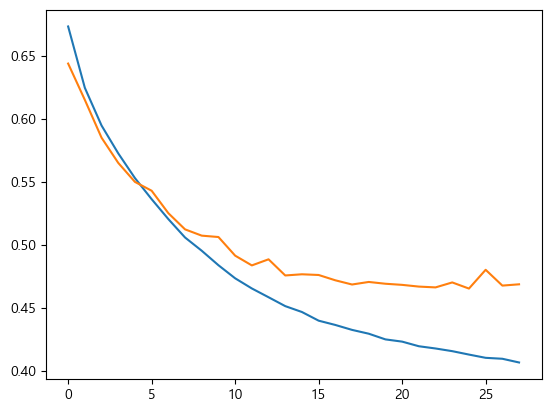

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
model.evaluate(val_seq,val_target)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7833 - loss: 0.4683


[0.4652726650238037, 0.784600019454956]